In [1]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from IPython.core.pylabtools import figsize
from sklearn.linear_model import LinearRegression, LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

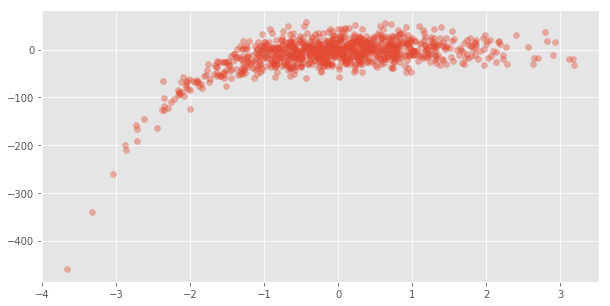

In [2]:
size = 1000
X = np.random.normal(size=size, scale=1)
X = np.sort(X)
y =  (X-1)**2-(X-1)**4+ np.random.normal(size=size, scale=20)

plt.style.use("ggplot")
figsize(10,5)
plt.scatter(X, y, alpha=0.4)

In [8]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
reg = LGBMRegressor()
reg2 = GradientBoostingRegressor()
reg.fit(X=X.reshape(len(X),-1), y=y.reshape(len(X),-1))
reg2.fit(X=X.reshape(len(X),-1), y=y.reshape(len(X),-1))

/Users/h_chang/env/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [10]:
from convex_regressors import CAPRegressor, ConvexPiecewiseLinearRegressor, ConvexifyRegressor, MAPE
from pygam import LinearGAM
capr1 = CAPRegressor(convex=False)
capr2 = ConvexPiecewiseLinearRegressor(convex=False)
capr3 = ConvexifyRegressor(convex=False)
capr4 = ConvexifyRegressor(convex=False)
capr5 = LinearGAM(constraints='concave')

In [11]:
capr1.fit(X, y)
capr2.fit(X, y)
capr3.fit(X=X, y=y, trained_regressor=reg, percentile=10)
capr4.fit(X=X, y=y, trained_regressor=reg2, percentile=10)
capr5.fit(X=X, y=y)

LinearGAM(callbacks=[Deviance(), Diffs()], constraints='concave', 
   dtype='auto', fit_intercept=True, fit_linear=False, 
   fit_splines=True, lam=0.6, max_iter=100, n_splines=25, 
   penalties='auto', scale=None, spline_order=3, tol=0.0001, 
   verbose=False)

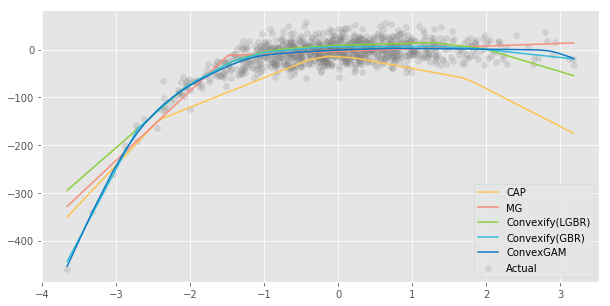

In [14]:
plt.scatter(X, y, alpha=0.2,  label="Actual", color="gray")
plt.plot(X, capr1.predict(X), label="CAP", color="#FDC44F")
plt.plot(X, capr2.predict(X), label="MG", color="#F58E7E")
plt.plot(X, capr3.predict(X), label="Convexify(LGBR)", color="#8DCF3F")
plt.plot(X, capr4.predict(X), label="Convexify(GBR)", color="#33BFDB")
plt.plot(X, capr5.predict(X), label="ConvexGAM", color="#0E7AC4")
plt.legend()